In [1]:
import scipy.io as scpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE
import scipy.optimize as opt
import glob
import sys
import os
import theano.tensor as T
from theano import function
from theano import shared
import theano
from theano.tensor.signal import downsample
from theano.tensor.nnet import conv

#np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Layer, Reshape, Merge #,AutoEncoder
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Convolution1D,MaxPooling1D,UpSampling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#import keras.utils.visualize_util as vutil #Pydot issues
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.regularizers import l1, l2, l1l2, activity_l2, activity_l1
#import keras.layers.containers as containers  #No module named containers
from keras.layers.noise import GaussianNoise
from keras.regularizers import ActivityRegularizer
from keras import backend as K
#import keras.utils.visualize_util as vutil
from keras.models import model_from_json
#from keras.utils.visualize_util import plot, to_graph

from IPython.display import SVG

np.set_printoptions(suppress=True)  #Supress exponent of the number 2e-2 == 0.02

%matplotlib inline
print("All imports done")


#Ref: http://deeplearning.net/, https://www.kaggle.com/wiki/Tutorials etc..

#caso_I.mat, caso_II.mat, caso_III.mat, caso_base.mat, consumer_data.xlsx

#print(os.getcwd() + "\n")
#print os.listdir(os.getcwd())
dataSmartGrid = scpy.loadmat('demcliMat.mat')
print type(dataSmartGrid)

data = dataSmartGrid['demcliMat']
print data.shape
print data
print("Example:")
print data[1]

np.unique(data[:,-1:])

X = data[:,0:-1]
Y = data[:,-1]

print X.shape, Y.shape

#print X.shape
Y1 = Y
Y1[Y1==2] = 1
print Y1.shape

np.unique(Y1)

#print data[0:5,:]
#print data[0:5,0:-1]
#print data[0:5,-1]


#print X
#print Y
#Splitting data into train and testing. 70% Training and 30% Testing..
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=4)

print X_train.shape, y_train.shape, X_test.shape, y_test.shape
#print numpy.unique(Y_test)

X_train_1 = X_train.reshape(8526,12,1)
X_test_1 = X_test.reshape(3654,12,1)

print X_train_1.shape, X_test_1.shape 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')




# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

print("Sets made")

rms = RMSprop()

Using gpu device 0: GeForce GTX 650 Ti (CNMeM is disabled, cuDNN 4007)
/home/rahul/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
Using Theano backend.


All imports done
<type 'dict'>
(12180, 13)
[[ 343.33881535  292.94608369  317.56346931 ...,    0.            0.            2.        ]
 [ 229.55690517  183.19172676    0.         ...,    0.            0.            2.        ]
 [ 106.98249046   79.89465389   60.93378272 ...,   50.91543646
    44.87156581    1.        ]
 ..., 
 [ 232.28249497  135.43054     200.91859872 ...,  187.78214091
   191.41443704    0.        ]
 [ 239.19601078  206.37272444  174.6964434  ...,  297.67230497
   202.62736538    0.        ]
 [ 277.38010202  209.01016123  277.00169283 ...,  146.70298371
   309.63963308    0.        ]]
Example:
[ 229.55690517  183.19172676    0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    2.        ]
(12180, 12) (12180,)
(12180,)
(8526, 12) (8526,) (3654, 12) (3654,)
(8526, 12, 1) (3654, 12, 1)
(8526, 'train samples')
(3654, 'test samples')
Sets made


/home/rahul/anaconda2/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [1]:
#################################################################

In [2]:
##################################################################

In [2]:
rms = RMSprop()


model = Sequential()
model.add(LSTM(64, return_sequences=True,
               input_shape = (12 , 1) )  ) # returns a sequence of vectors of dimension 32
model.add(Dropout(.25))
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(Dropout(.25))
model.add(LSTM(64))  # return a single vector of dimension 32
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=rms, metrics=["accuracy"] )

model.fit(X_train_1, Y_train,
          batch_size=64, nb_epoch=500,
          validation_data=(X_test_1, Y_test))

Train on 8526 samples, validate on 3654 samples
Epoch 1/500
8526/8526 [==============================] - 8s - loss: 0.1750 - acc: 0.9516 - val_loss: 0.1385 - val_acc: 0.9663
Epoch 2/500
8526/8526 [==============================] - 9s - loss: 0.1523 - acc: 0.9646 - val_loss: 0.1374 - val_acc: 0.9699
Epoch 3/500
8526/8526 [==============================] - 8s - loss: 0.1485 - acc: 0.9656 - val_loss: 0.1335 - val_acc: 0.9699
Epoch 4/500
8526/8526 [==============================] - 8s - loss: 0.1459 - acc: 0.9655 - val_loss: 0.1431 - val_acc: 0.9699
Epoch 5/500
8526/8526 [==============================] - 8s - loss: 0.1453 - acc: 0.9654 - val_loss: 0.1294 - val_acc: 0.9699
Epoch 6/500
8526/8526 [==============================] - 8s - loss: 0.1441 - acc: 0.9656 - val_loss: 0.1276 - val_acc: 0.9699
Epoch 7/500
8526/8526 [==============================] - 8s - loss: 0.1418 - acc: 0.9661 - val_loss: 0.1242 - val_acc: 0.9702
Epoch 8/500
8526/8526 [==============================] - 8s - loss: 0.

In [ ]:
#############################

In [3]:
Y_preds_lstm = model.predict_classes(X_test_1, verbose=0)
print(Y_preds_lstm)

[0 0 0 ..., 0 0 0]


In [11]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(y_test,Y_preds_lstm)
#plt.imshow(conf)
print conf

[[3386   16]
 [  98  154]]


In [12]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_preds_lstm, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      1.00      0.98      3402
    class 1       0.91      0.61      0.73       252

avg / total       0.97      0.97      0.97      3654



[[ 0.99267769  0.00732235]
 [ 0.99916822  0.00083174]
 [ 0.9988935   0.00110644]
 [ 0.99984407  0.00015592]
 [ 0.99982941  0.00017053]]


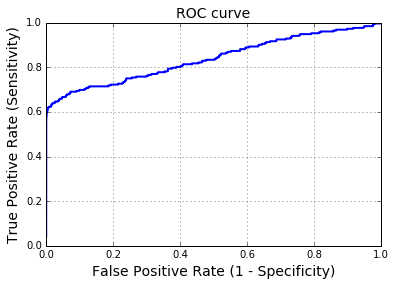

In [13]:
Y_preds_prob_lstm = model.predict_proba(X_test_1, verbose=0)
print(Y_preds_prob_lstm[:5])




#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, Y_preds_prob_lstm[:,1])
plt.plot(fpr1, tpr1, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

plt.savefig('smartgrid_lstm_roc.png')

#Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

In [14]:
print metrics.roc_auc_score(y_test, Y_preds_prob_lstm[:,1])

0.837554706382
